In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/Sample - Superstore.csv", encoding = "latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.groupby("Category")[["Sales","Profit"]].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


Technology brings most Sales and Profit 

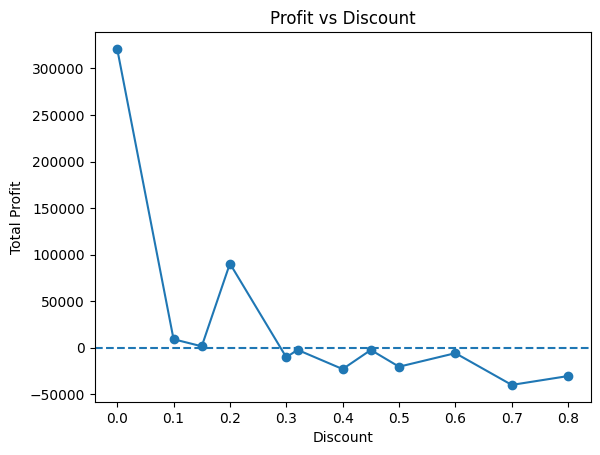

In [8]:
df.groupby("Discount")["Profit"].sum().plot(marker = "o")
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.axhline(0, linestyle = "--")
plt.show()

Profit vs Discount table shows total profit peak at 0% discount, and profit is at a loss at around 30% 

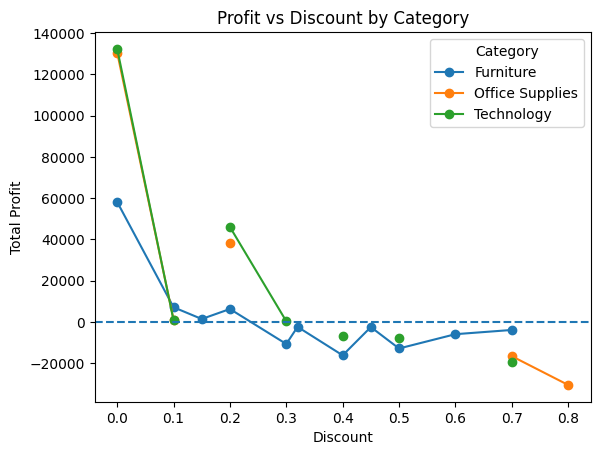

In [11]:
(
    df.groupby(["Category","Discount"]) ["Profit"]
    .sum()
    .unstack(0)
    .plot(marker = "o")
)

plt.title("Profit vs Discount by Category")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.axhline(0, linestyle = "--")
plt.show()

From the table we can see that Furniture specifically goes at a loss first in between 20-30% discount

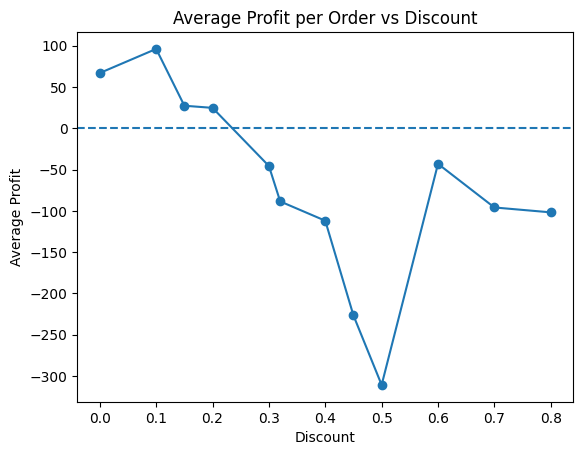

In [14]:
(
    df.groupby("Discount")["Profit"]
    .mean()
    .plot(marker = "o")
)

plt.title("Average Profit per Order vs Discount")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.axhline(0, linestyle = "--")
plt.show()

Discounting above 25% causes the average transaction to lose money. Th
is suggests that discount strategy is reducing profitability rather than driving profitable growth

## Category Difference 
Technolgy generates the highest overall sales and profit. However, Furtniture becomes loss-making at lower discount levels at around 25-30%, suggesting weaker margins and higher pricing sensitivity compared to other categories

## Recommendations:
Based on analysis:
1. Limit discount above 25%, as average profit per order becomes negative beyond this point.
2. Focus frowth on Technology products, as they consistently generate highest sales and profit
3. Reassess discont strategy for Furniture, as higher discount often lead to losses instead of increased profitability.
4. Use targeted discounts rather than broad discounting across all categories.

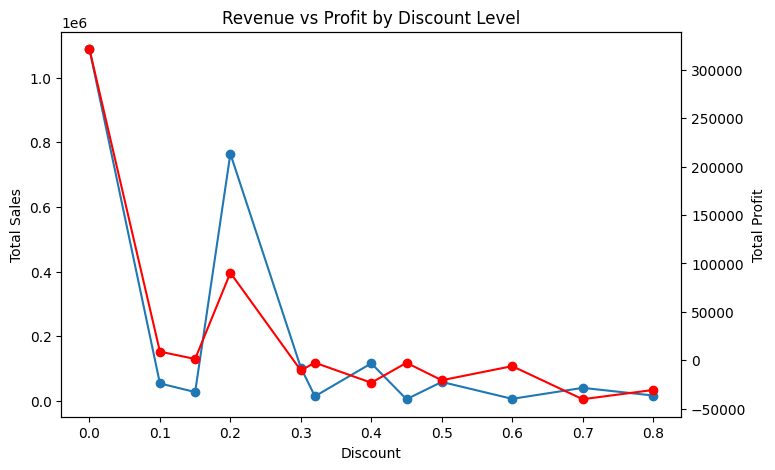

In [19]:
discount_summary = df.groupby("Discount")[["Sales", "Profit"]].sum()

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(discount_summary.index, discount_summary["Sales"], marker = "o")
ax1.set_xlabel("Discount")
ax1.set_ylabel("Total Sales")
ax1.set_title("Revenue vs Profit by Discount Level")

ax2 = ax1.twinx()
ax2.plot(discount_summary.index, discount_summary["Profit"], marker = "o", color = "r")
ax2.set_ylabel("Total Profit")

plt.show()

### Summary

Revenue and profit both decline as discounts increase. 

Although a 20% discount generates a temporary increase in sales, it does not significantly improve profitability. 

Discounts above 25–30% consistently result in losses, suggesting the current discount strategy may be eroding margins without delivering sustainable revenue growth.

In [22]:
df.to_csv("cleaned_data.csv", index = False)